In [5]:
from pykafka import KafkaClient
from pykafka.common import OffsetType
import sys
import time
import numpy as np

In [6]:
client = KafkaClient("127.0.0.1:9092", broker_version="1.0.0")

In [7]:
client.topics

{b'test': <pykafka.topic.Topic at 0x1ade432fc50 (name=b'test')>}

In [8]:
time.ctime()

'Tue Dec 25 00:07:09 2018'

In [9]:
topic = client.topics['test']

consumer = topic.get_simple_consumer(
    consumer_group="mygroup",
    auto_offset_reset=OffsetType.LATEST)

# for message in consumer:
#      if message is not None:
#          print(time.ctime(message.timestamp), message.offset, eval(message.value))

<IPython.core.display.Javascript object>


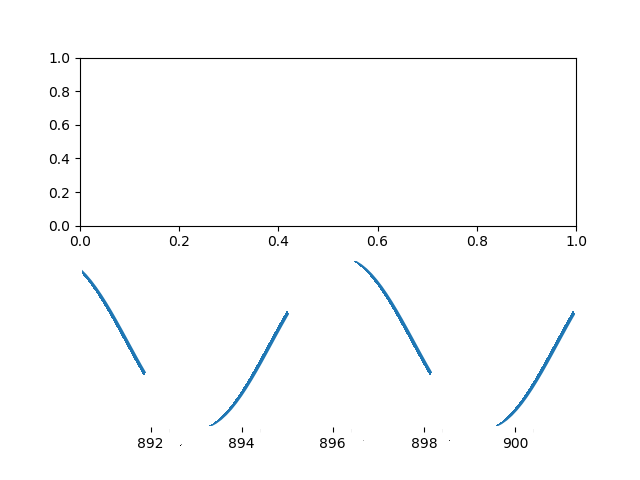

KeyboardInterrupt: 

In [10]:
%matplotlib notebook

import time
from matplotlib import pyplot as plt
import numpy as np



def live_update_demo(blit = False):
    x = np.linspace(0,50., num=100)
    y = [0] * 100
    init_x = np.linspace(0,50., num=100)
    X,Y = np.meshgrid(init_x, init_x)
    fig = plt.figure()
    ax1 = fig.add_subplot(2, 1, 1)
    ax2 = fig.add_subplot(2, 1, 2)

    fig.canvas.draw()   # note that the first draw comes before setting data 

#     h1 = ax1.imshow(X, vmin=-1, vmax=1, interpolation="None", cmap="RdBu")

    h2, = ax2.plot(x, lw=3)
    text = ax2.text(0.8,1.5, "")
    ax2.set_ylim([-1,1])

    x = x.tolist()
    if blit:
        # cache the background
        axbackground = fig.canvas.copy_from_bbox(ax1.bbox)
        ax2background = fig.canvas.copy_from_bbox(ax2.bbox)

    t_start = time.time()
    time.sleep(.1)
    i = 1.
    for message in consumer:
         if message is not None:
            i+=1.
#             print(message.timestamp, message.value)
            new_coords = eval(message.value)
            x.append(new_coords['x'])
            x = x[-100:]
            
            y.append(new_coords['y'])
            y = y[-100:]

            h2.set_data(x, y)
            ax2.set_xlim([x[0], x[-1]])
#             h2.set_ydata(y)
            tx = 'Mean Frame Rate:\n %1.3fFPS\nTime is %s' % (((i+1) / (time.time() - t_start)),  time.ctime(message.timestamp)) 
            text.set_text(tx)
            #print tx

            if blit:
                # restore background
                fig.canvas.restore_region(axbackground)
                fig.canvas.restore_region(ax2background)

                # redraw just the points
#                 ax1.draw_artist(h1)
                ax2.draw_artist(h2)

                # fill in the axes rectangle
#                 fig.canvas.blit(ax1.bbox)
                fig.canvas.blit(ax2.bbox)
                # in this post http://bastibe.de/2013-05-30-speeding-up-matplotlib.html
                # it is mentionned that blit causes strong memory leakage. 
                # however, I did not observe that.

            else:
                # redraw everything
                fig.canvas.draw()
                fig.canvas.flush_events()


            plt.pause(0.000000000001) 
            #plt.pause calls canvas.draw(), as can be read here:
            #http://bastibe.de/2013-05-30-speeding-up-matplotlib.html
            #however with Qt4 (and TkAgg??) this is needed. It seems,using a different backend, 
            #one can avoid plt.pause() and gain even more speed.


# live_update_demo(True) # 28 fps
live_update_demo(False) # 18 fps